# ME314 Homework 6

### Submission instructions

Deliverables that should be included with your submission are shown in **bold** at the end of each problem statement and the corresponding supplemental material. **Your homework will be graded IFF you submit a single PDF, .mp4 videos of animations when requested and a link to a Google colab file that meet all the requirements outlined below.**

- List the names of students you've collaborated with on this homework assignment.
- Include all of your code (and handwritten solutions when applicable) used to complete the problems.
- Highlight your answers (i.e. **bold** and outline the answers) for handwritten or markdown questions and include simplified code outputs (e.g. .simplify()) for python questions.
- Enable Google Colab permission for viewing
 * Click Share in the upper right corner
 * Under "Get Link" click "Share with..." or "Change"
 * Then make sure it says "Anyone with Link" and "Editor" under the dropdown menu
- Make sure all cells are run before submitting (i.e. check the permission by running your code in a private mode)
 * Please don't make changes to your file after submitting, so we can grade it!
- Submit a link to your Google Colab file that has been run (before the submission deadline) and don't edit it afterwards!

**NOTE:** This Juputer Notebook file serves as a template for you to start homework. Make sure you first copy this template to your own Google driver (click "File" -> "Save a copy in Drive"), and then start to edit it.

In [112]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

In [113]:
def integrate(f, xt, dt):
    """
    This function takes in an initial condition x(t) and a timestep dt,
    as well as a dynamical system f(x) that outputs a vector of the
    same dimension as x(t). It outputs a vector x(t+dt) at the future
    time step.

    Parameters
    ============
    dyn: Python function
        derivate of the system at a given step x(t),
        it can considered as \dot{x}(t) = func(x(t))
    xt: NumPy array
        current step x(t)
    dt:
        step size for integration

    Return
    ============
    new_xt:
        value of x(t+dt) integrated from x(t)
    """
    k1 = dt * f(xt)
    k2 = dt * f(xt+k1/2.)
    k3 = dt * f(xt+k2/2.)
    k4 = dt * f(xt+k3)
    new_xt = xt + (1/6.) * (k1+2.0*k2+2.0*k3+k4)
    return new_xt

def simulate(f, x0, tspan, dt, integrate):
    """
    This function takes in an initial condition x0, a timestep dt,
    a time span tspan consisting of a list [min_time, max_time],
    as well as a dynamical system f(x) that outputs a vector of the
    same dimension as x0. It outputs a full trajectory simulated
    over the time span of dimensions (xvec_size, time_vec_size).

    Parameters
    ============
    f: Python function
        derivate of the system at a given step x(t),
        it can considered as \dot{x}(t) = func(x(t))
    x0: NumPy array
        initial conditions
    tspan: Python list
        tspan = [min_time, max_time], it defines the start and end
        time of simulation
    dt:
        time step for numerical integration
    integrate: Python function
        numerical integration method used in this simulation

    Return
    ============
    x_traj:
        simulated trajectory of x(t) from t=0 to tf
    """
    N = int((max(tspan)-min(tspan))/dt)
    x = np.copy(x0)
    tvec = np.linspace(min(tspan),max(tspan),N)
    xtraj = np.zeros((len(x0),N))
    for i in range(N):
        xtraj[:,i]=integrate(f,x,dt)
        x = np.copy(xtraj[:,i])
    return xtraj

## Problem 1 (20pts)

Show that if $R(\theta_1)$ and $R(\theta_2)\in SO(n)$ then the product is also a rotation matrix, that is $R(\theta_1)R(\theta_2)\in SO(n)$.
    
> Hint 1: You know this is true when $n=2$ by direct calculation in class, but for $n\neq2$ you should use the definition of $SO(n)$ to verify it for arbitrary $n$. Do not try to do this by analyzing individual components of the matrix.
    
**Turn in: A scanned (or photograph from your phone or webcam) copy of your handwritten solution. You can also use *LaTeX*. If you use SymPy, you need to include a copy of your code and the code outputs. Make sure to note why your handwritten solution / code output explains the results.**

$SO(n)$ is the set of square matrices called the Special Orthogonal Group. For any $n\times n$ square matrix $A$ in $SO(n)$, it follows the properties $A^TA = I_{n \times n}$ and $det A = \pm 1$

For the product, $R(\theta_1) R(\theta_2)$, if we evaluate:

 $(R(\theta_1) R(\theta_2))^T$$R(\theta_1) R(\theta_2)$ $ = R(\theta_2)^TR(\theta_1)^TR(\theta_1)R(\theta_2)$

 and since $R(\theta_1)$ and $R(\theta_2)$ belong to $SO(n)$,

 this expression evaluates to $I$

 Also, $detR(\theta_1)R(\theta_2) = detR(\theta_1)detR(\theta_2) = 1$

 Therefore, $R(\theta_1)R(\theta_2)$ belongs to $SO(n)$  

## Problem 2 (20pts)

Show that if $g(x_1,y_1,\theta_1)$ and $g(x_2,y_2,\theta_2)\in SE(2)$ then the product satisfies $g(x_1,y_1,\theta_1)g(x_2,y_2,\theta_2)\in SE(2)$.

**Turn in: A scanned (or photograph from your phone or webcam) copy of your hand written solution. You can also use *LaTeX*. If you use SymPy, you need to include a copy of your code and the code outputs. Make sure to note why your handwritten soultion / code output explains the results.**

$g(x_1, y_1, \theta_1)$ and $g(x_2, y_2, \theta_2)$ are elements of $SE(2)$ then they have the form

$g(x_1, y_1, \theta_1)$ $ = \begin{pmatrix} \cos(\theta_1) & -\sin(\theta_1) & x_1 \\ \sin(\theta_1) & \cos(\theta_1) & y_1 \\ 0 & 0 & 1\end{pmatrix}$

$g(x_2, y_2, \theta_2)$ $ = \begin{pmatrix} \cos(\theta_2) & -\sin(\theta_2) & x_2 \\ \sin(\theta_2) & \cos(\theta_2) & y_2 \\ 0 & 0 & 1\end{pmatrix}$

$g(x_1, y_1, \theta_1)g(x_2, y_2, \theta_2)$ $ = \begin{pmatrix} \cos(\theta_1)\cos(\theta_2) - \sin(\theta_1)\sin(\theta_2) & -\cos(\theta_1)\sin(\theta_2) -\sin(\theta_1)\cos(\theta_2) & x_2\cos(\theta_1) - y_2\sin(\theta_1) + x_1\\ \sin(\theta_1)\cos(\theta_2) + \cos(\theta_1)\sin(\theta_2) & \cos(\theta_1)\cos(\theta_2) - \sin(\theta_1)\sin(\theta_2) & x_2\sin(\theta_1) + y_2\cos(\theta_1) + y_1 \\ 0 & 0 & 1\end{pmatrix}$

$g(x_1, y_1, \theta_1)g(x_2, y_2, \theta_2)$ $ = \begin{pmatrix} \cos(\theta_1 + \theta_2) & -\sin(\theta_1+\theta_2) & x_2\cos(\theta_1) - y_2\sin(\theta_1) + x_1 \\ \sin(\theta_1 + \theta_2) & \cos(\theta_1 + \theta_2) & x_2\sin(\theta_1) + y_2\cos(\theta_1) + y_1 \\ 0 & 0 & 1\end{pmatrix}$

which shows that $g(x_1, y_1, \theta_1)g(x_2, y_2, \theta_2)$ is also an element of $SE(2)$

## Problem 3 (20pts)

Show that any homogeneous transformation in SE(2) can be separated into a rotation and a translation. What's the order of the two operations, which comes first? What's different if we flip the order in which we compose the rotation and translation?
    
>Hint 1: For the rotation and translation operation, we first need to know what's the reference frame for these two operations.

**Turn in: A scanned (or photograph from your phone or webcam) copy of your hand written solution. You can also use *LaTeX*. If you use SymPy, you need to include a copy of your code and the code outputs. Make sure to note why your handwritten soultion / code output explains the results.**

Let $m = \begin{pmatrix} a \\ b \\ 1\end{pmatrix}$
and
$g(x_1, y_1, \theta_1)$ $ = \begin{pmatrix} \cos(\theta_1) & -\sin(\theta_1) & x_1 \\ \sin(\theta_1) & \cos(\theta_1) & y_1 \\ 0 & 0 & 1\end{pmatrix}$ be an element of $SE(2)$

After undergoing a homogenous transformation, $m$ becomes $m^-= \begin{pmatrix} a\cos(\theta_1) -b\sin(\theta_1) + x_1 \\ a\sin(\theta_1)+ b\cos(\theta_1) + y_1 \\ 1\end{pmatrix} $

We know that $g(x_1, y_1, \theta_1)$ is composed of a $R$ and $p$ element. If we separate them and compose them with $m$:

$R(\theta_1) : \begin{pmatrix} cos(\theta_1) & -sin(\theta_1) \\ \sin(\theta_1)& \cos(\theta_1)\end{pmatrix}$ $\times \begin{pmatrix} a \\ b \end{pmatrix} = \begin{pmatrix} a\cos(\theta_1) -b\sin(\theta_1)\\ a\sin(\theta_1) + b\cos(\theta_1) \end{pmatrix}$

Now composing this result with $p: \begin{pmatrix} x_1 \\ y_1 \end{pmatrix}$

$m^t =  \begin{pmatrix} a\cos(\theta_1) -b\sin(\theta_1)\\ a\sin(\theta_1) + b\cos(\theta_1) \end{pmatrix} +  \begin{pmatrix} x_1 \\ y_1 \end{pmatrix} = \begin{pmatrix} a\cos(\theta_1) -b\sin(\theta_1) + x_1 \\ a\sin(\theta_1)+ b\cos(\theta_1) + y_1 \end{pmatrix}$

Which proves that $m^t = m^-$ and show that any homogenous transformation can be separated into a rotation and translation. The order of the operations are Rotation and then translation. If we flip the order in which rotation and translation are composed we can clearly observe in this example, that we will not get the same result since this operation is not commutative.


## Problem 4 (20pts)

Simulate the same double-pendulum system in previous homework using only homogeneous transformation (and thus avoid using trigonometry). Simulate the system for $t\in[0,3]$ with $dt=0.01$. The parameters are $m_1=m_2=1, R_1=R_2=1, g=9.8$ with initial conditions $\theta_1=\theta_2=-\frac{\pi}{3}, \dot{\theta}_1=\dot{\theta}_2=0$. <u>Do not use functions provided in the modern robotics package for manipulating transformation matrices such as RpToTrans(), etc.</u>

> Hint 1: Same as in the lecture, you will need to define the frames by yourself in order to compute the Lagrangian. An example is shown below.

**Turn in: Include a copy of your code used to simulate the system, and clearly labeled plot of $\theta_1$ and $\theta_2$ trajectory. Also, attach a figure showing how you defined the frames.**

In [114]:
from IPython.core.display import HTML
display(HTML("<table><tr><td><img src='https://github.com/MuchenSun/ME314pngs/raw/master/doubpend_frames.jpg' width=500' height='350'></table>"))

In [115]:
from IPython.core.display import HTML
display(HTML("<table><tr><td><img src='https://github.com/user-attachments/assets/c87be5d8-55a5-435f-950f-5689ab2383f0' width=500' height='350'></table>"))


Shape of trajectory:  (4, 300)


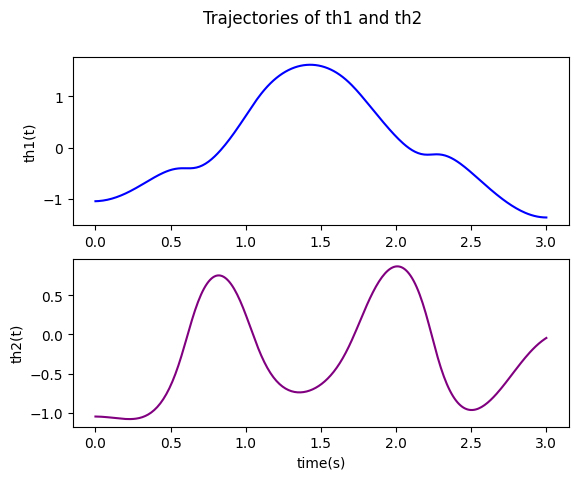

In [116]:
# Defining useful symbols
m1, m2, R1, R2, g, t = sym.symbols(r'm_1, m_2, R_1, R_2, g, t')
th1 = sym.Function(r'\theta_1')(t)
th2 = sym.Function(r'\theta_2')(t)
q = sym.Matrix([th1, th2])
th1dot = th1.diff(t)
th2dot = th2.diff(t)
qdot = sym.Matrix([th1dot, th2dot])
qddot = qdot.diff(t)
# Defining the rotation matrices for th1 and th2
R_th1 = sym.Matrix([[sym.cos(th1), -sym.sin(th1)], [sym.sin(th1), sym.cos(th1)]])
R_th2 = sym.Matrix([[sym.cos(th2), -sym.sin(th2)], [sym.sin(th2), sym.cos(th2)]])

# Defining the transformation between the frames
g_wa = (R_th1.col_insert(2, sym.Matrix([0, 0]))).row_insert(2, sym.Matrix([[0, 0, 1]]))

I_2 = sym.eye(2)
g_ab_t = (I_2.col_insert(2, sym.Matrix([0, -R1]))).row_insert(2, sym.Matrix([[0, 0, 1]]))

g_bc_R = (R_th2.col_insert(2, sym.Matrix([0, 0]))).row_insert(2, sym.Matrix([[0, 0, 1]]))

g_cd_t = (I_2.col_insert(2, sym.Matrix([0, -R2]))).row_insert(2, sym.Matrix([[0, 0, 1]]))

g_wb = g_wa*g_ab_t
# Position of pendulum 1
r_1 = sym.Matrix([g_wb[0,2], g_wb[1,2]])

g_wd = g_wb*g_bc_R*g_cd_t
# Position of pendulum 2
r_2 = sym.Matrix([g_wd[0,2], g_wd[1,2]])

# Velocities of pendulum 1 and 2
v_1 = r_1.diff(t)
v_2 = r_2.diff(t)

# Kinetic energy of the system
KE = 0.5*m1*(v_1[0]**2 + v_1[1]**2) + 0.5*m2*(v_2[0]**2 + v_2[1]**2)

# Potential energy of the system
PE = m1*g*r_1[1] + m2*g*r_2[1]

# Lagrangian of the system
L = KE - PE

# EL Expression
L_mat = sym.Matrix([L])
dLdq = L_mat.jacobian(q)
dLdqdot = L_mat.jacobian(qdot)
dtdLdqdot = dLdqdot.diff(t)

EL = dLdq - dtdLdqdot
# display(EL.T)

# EL Equation
EL_rhs = sym.Matrix([0, 0])
EL_eqn = sym.simplify(sym.Eq(EL.T, EL_rhs))

# Solving for th1ddot and th2ddot
soln = sym.solve(EL_eqn, qddot, dict=True)

th1ddot_lam = sym.lambdify([m1, m2, R1, R2, g, th1, th2, th1dot, th2dot], soln[0][qddot[0]])
th2ddot_lam = sym.lambdify([m1, m2, R1, R2, g, th1, th2, th1dot, th2dot], soln[0][qddot[1]])

def ddot(q):
  """
  Returns the ddot value of the system variables at given dot values
  """
  th1_ddot = th1ddot_lam(1,1,1,1,9.8,q[0],q[1],q[2],q[3])
  th2_ddot = th2ddot_lam(1,1,1,1,9.8,q[0],q[1],q[2],q[3])
  return th1_ddot, th2_ddot


def dyn(q):
  """
  Return the derivative of the system state vector

  Parameter:
  f = [th1, th2, th1dot, th2dot]

  Returns:
  fdot = [th1dot, th2dot, th1ddot, th2ddot]
  """
  return np.array([q[2],q[3], ddot(q)[0],ddot(q)[1]])


# Extending the state vector of the system
f = np.array([q[0],q[1],qdot[0],qdot[1]])
# Defining initial state of the system
s0 = np.array([-np.pi/3, -np.pi/3, 0, 0])

traj = simulate(dyn, s0, [0,3], 0.01, integrate)

print("\033[1mShape of trajectory: \033[0m", traj.shape)

timespan = np.linspace(0,3,300)

fig,(ax1, ax2) = plt.subplots(2,1)
fig.suptitle("Trajectories of th1 and th2")

ax1.plot(timespan, traj[0,:], 'blue')
ax1.set_ylabel('th1(t)')

ax2.plot(timespan, traj[1,:], 'purple')
ax2.set_ylabel('th2(t)')
ax2.set_xlabel('time(s)')

plt.show()

## Problem 5 (20pts)

Modify the previous animation function for the double-pendulum such that the animation shows the frames you defined in the last problem (it's similar to the ``tf`` in RViz, if you're familiar with ROS). All the *x axes* should be displayed in <font color='green'>green</font> and all the *y axes* should be displayed in <font color='red'>red</font>, with axis's length of 0.3 for all. An animation example can be found at [https://youtu.be/2H3KvRWQqys](https://youtu.be/2H3KvRWQqys). <u>Do not use functions provided in the modern robotics package for manipulating transformation matrices such as RpToTrans(), etc. </u>

> Hint 1: Each axis can be considered as a line connecting the origin and the point $[0.3, 0]$ or $[0, 0.3]$ in that frame. You will need to use the homogeneous transformations to transfer these two axis/points back into the world/fixed frame. Example code showing how to display one frame is provided below.

**Turn in: Include a copy of your code used for animation and a video of the animation. The video can be uploaded separately through Canvas, and it should be in ".mp4" format. You can either use screen capture or record the screen directly with your phone.**

In [ ]:
def animate_double_pend(theta_array,L1=1,L2=1,T=10):
    """
    Function to generate web-based animation of double-pendulum system

    Parameters:
    ================================================
    theta_array:
        trajectory of theta1 and theta2, should be a NumPy array with
        shape of (2,N)
    L1:
        length of the first pendulum
    L2:
        length of the second pendulum
    T:
        length/seconds of animation duration

    Returns: None
    """

    ################################
    # Imports required for animation.
    from plotly.offline import init_notebook_mode, iplot
    from IPython.display import display, HTML
    import plotly.graph_objects as go

    #######################
    # Browser configuration.
    def configure_plotly_browser_state():
        import IPython
        display(IPython.core.display.HTML('''
            <script src="/static/components/requirejs/require.js"></script>
            <script>
              requirejs.config({
                paths: {
                  base: '/static/base',
                  plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
                },
              });
            </script>
            '''))
    configure_plotly_browser_state()
    init_notebook_mode(connected=False)

    ###############################################
    # Getting data from pendulum angle trajectories.
    xx1=L1*np.sin(theta_array[0])
    yy1=-L1*np.cos(theta_array[0])
    xx2=xx1+L2*np.sin(theta_array[0]+theta_array[1])
    yy2=yy1-L2*np.cos(theta_array[0]+theta_array[1])
    N = len(theta_array[0]) # Need this for specifying length of simulation

    ###############################################
    # Define arrays containing data for frame axes
    # In each frame, the x and y axis are always fixed
    x_axis = np.array([0.3, 0.0])
    y_axis = np.array([0.0, 0.3])
    # Use homogeneous tranformation to transfer these two axes/points
    # back to the fixed frame
    frame_a_x_axis = np.zeros((2,N))
    frame_a_y_axis = np.zeros((2,N))
    frame_b_x_axis = np.zeros((2,N))
    frame_b_y_axis = np.zeros((2,N))
    frame_c_x_axis = np.zeros((2,N))
    frame_c_y_axis = np.zeros((2,N))
    frame_d_x_axis = np.zeros((2,N))
    frame_d_y_axis = np.zeros((2,N))
    for i in range(N): # iteration through each time step
        # evaluate homogeneous transformation
        t_wa = np.array([[np.cos(theta_array[0][i]), -np.sin(theta_array[0][i]), 0],
                         [np.sin(theta_array[0][i]),  np.cos(theta_array[0][i]), 0],
                         [                        0,                          0, 1]])
        # transfer the x and y axes in body frame back to fixed frame at
        # the current time step
        frame_a_x_axis[:,i] = t_wa.dot([x_axis[0], x_axis[1], 1])[0:2]
        frame_a_y_axis[:,i] = t_wa.dot([y_axis[0], y_axis[1], 1])[0:2]
        t_ab = np.array([[1, 0, 0],
                         [0, 1, -1],
                         [0, 0, 1]])
        t_wb = np.matmul(t_wa, t_ab)
        frame_b_x_axis[:, i] = t_wb.dot([x_axis[0], x_axis[1], 1])[0:2]
        frame_b_y_axis[:, i] = t_wb.dot([y_axis[0], y_axis[1], 1])[0:2]
        t_bc = np.array([[np.cos(theta_array[1][i]), -np.sin(theta_array[1][i]), 0],
                         [np.sin(theta_array[1][i]),  np.cos(theta_array[1][i]), 0],
                         [                        0,                          0, 1]])
        t_wc = np.matmul(t_wb, t_bc)
        frame_c_x_axis[:,i] = t_wc.dot([x_axis[0], x_axis[1], 1])[0:2]
        frame_c_y_axis[:,i] = t_wc.dot([y_axis[0], y_axis[1], 1])[0:2]
        t_cd = np.array([[1, 0, 0],
                         [0, 1, -1],
                         [0, 0, 1]])
        t_wd = np.matmul(t_wc, t_cd)
        frame_d_x_axis[:,i] = t_wd.dot([x_axis[0], x_axis[1], 1])[0:2]
        frame_d_y_axis[:,i] = t_wd.dot([y_axis[0], y_axis[1], 1])[0:2]
    ####################################
    # Using these to specify axis limits.
    xm = -3 #np.min(xx1)-0.5
    xM = 3 #np.max(xx1)+0.5
    ym = -3 #np.min(yy1)-2.5
    yM = 3 #np.max(yy1)+1.5

    ###########################
    # Defining data dictionary.
    # Trajectories are here.
    data=[
        # note that except for the trajectory (which you don't need this time),
        # you don't need to define entries other than "name". The items defined
        # in this list will be related to the items defined in the "frames" list
        # later in the same order. Therefore, these entries can be considered as
        # labels for the components in each animation frame
        dict(name='Arm'),
        dict(name='Mass 1'),
        dict(name='Mass 2'),
        dict(name='World Frame X'),
        dict(name='World Frame Y'),
        dict(name='A Frame X Axis'),
        dict(name='A Frame Y Axis'),
        dict(name='B Frame X Axis'),
        dict(name='B Frame Y Axis'),
        dict(name='C Frame X Axis'),
        dict(name='C Frame Y Axis'),
        dict(name='D Frame X Axis'),
        dict(name='D Frame Y Axis'),
        # You don't need to show trajectory this time,
        # but if you want to show the whole trajectory in the animation (like what
        # you did in previous homeworks), you will need to define entries other than
        # "name", such as "x", "y". and "mode".

        # dict(x=xx1, y=yy1,
        #      mode='markers', name='Pendulum 1 Traj',
        #      marker=dict(color="fuchsia", size=2)
        #     ),
        # dict(x=xx2, y=yy2,
        #      mode='markers', name='Pendulum 2 Traj',
        #      marker=dict(color="purple", size=2)
        #     ),
        ]

    ################################
    # Preparing simulation layout.
    # Title and axis ranges are here.
    layout=dict(autosize=False, width=1000, height=1000,
                xaxis=dict(range=[xm, xM], autorange=False, zeroline=False,dtick=1),
                yaxis=dict(range=[ym, yM], autorange=False, zeroline=False,scaleanchor = "x",dtick=1),
                title='Double Pendulum Simulation',
                hovermode='closest',
                updatemenus= [{'type': 'buttons',
                               'buttons': [{'label': 'Play','method': 'animate',
                                            'args': [None, {'frame': {'duration': T, 'redraw': False}}]},
                                           {'args': [[None], {'frame': {'duration': T, 'redraw': False}, 'mode': 'immediate',
                                            'transition': {'duration': 0}}],'label': 'Pause','method': 'animate'}
                                          ]
                              }]
               )

    ########################################
    # Defining the frames of the simulation.
    # This is what draws the lines from
    # joint to joint of the pendulum.
    frames=[dict(data=[# first three objects correspond to the arms and two masses,
                       # same order as in the "data" variable defined above (thus
                       # they will be labeled in the same order)
                       dict(x=[0,xx1[k],xx2[k]],
                            y=[0,yy1[k],yy2[k]],
                            mode='lines',
                            line=dict(color='orange', width=3),
                            ),
                       go.Scatter(
                            x=[xx1[k]],
                            y=[yy1[k]],
                            mode="markers",
                            marker=dict(color="blue", size=12)),
                       go.Scatter(
                            x=[xx2[k]],
                            y=[yy2[k]],
                            mode="markers",
                            marker=dict(color="blue", size=12)),
                       # display x and y axes of the fixed frame in each animation frame
                       dict(x=[0,x_axis[0]],
                            y=[0,x_axis[1]],
                            mode='lines',
                            line=dict(color='green', width=3),
                            ),
                       dict(x=[0,y_axis[0]],
                            y=[0,y_axis[1]],
                            mode='lines',
                            line=dict(color='red', width=3),
                            ),
                       # display x and y axes of the {A} frame in each animation frame
                       dict(x=[0, frame_a_x_axis[0][k]],
                            y=[0, frame_a_x_axis[1][k]],
                            mode='lines',
                            line=dict(color='green', width=3),
                            ),
                       dict(x=[0, frame_a_y_axis[0][k]],
                            y=[0, frame_a_y_axis[1][k]],
                            mode='lines',
                            line=dict(color='red', width=3),
                            ),
                       # display x and y axes of the {B} frame in each animation frame
                       dict(x=[xx1[k], frame_b_x_axis[0][k]],
                            y=[yy1[k], frame_b_x_axis[1][k]],
                            mode='lines',
                            line=dict(color='green', width=3),
                            ),
                       dict(x=[xx1[k], frame_b_y_axis[0][k]],
                            y=[yy1[k], frame_b_y_axis[1][k]],
                            mode='lines',
                            line=dict(color='red', width=3),
                            ),
                       # display x and y axes of the {C} frame in each animation frame
                       dict(x=[xx1[k], frame_c_x_axis[0][k]],
                            y=[yy1[k], frame_c_x_axis[1][k]],
                            mode='lines',
                            line=dict(color='green', width=3),
                            ),
                       dict(x=[xx1[k], frame_c_y_axis[0][k]],
                            y=[yy1[k], frame_c_y_axis[1][k]],
                            mode='lines',
                            line=dict(color='red', width=3),
                            ),
                       # display x and y axes of the {D} frame in each animation frame
                       dict(x=[xx2[k], frame_d_x_axis[0][k]],
                            y=[yy2[k], frame_d_x_axis[1][k]],
                            mode='lines',
                            line=dict(color='green', width=3),
                            ),
                       dict(x=[xx2[k], frame_d_y_axis[0][k]],
                            y=[yy2[k], frame_d_y_axis[1][k]],
                            mode='lines',
                            line=dict(color='red', width=3),
                            ),
                      ]) for k in range(N)]

    #######################################
    # Putting it all together and plotting.
    figure1=dict(data=data, layout=layout, frames=frames)
    iplot(figure1)

sim_traj = np.array([traj[0,:], traj[1,:]])
animate_double_pend(sim_traj, L1=1, L2=1, T=3)